In [356]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
to_run = True
if to_run:
    os.chdir('..')
    to_run = False
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/
/


# Group Details

**Group ID:** 
20

**Group name:** 
Mandatory Assignments 20

**Group members that contributed to the assignment (full name):**
Shatin Nguyen, hlv332
Theis Baasch, thb763


# Part 1


Consider the following activities extracted from the Dreyers log introduced and examined in the paper The Analysis of a Real Life Declarative Process:

```python
Fill out application
Architect Review
Lawyer Review
Reject
Applicant informed
Change phase to Abort
Change Phase to Payout
First payment
Undo payment 
Change Phase to End Report
Account number changed
Approve changed account 
Execute abandon
Change phase to Abandon
```


## Task 1


Using these activities, model a simple workflow of an application process as a Petri net. It does not need to follow exactly the process as described in the paper and you may add additional details yourself, but you should ensure that your process captures at least the following rules:

1. Fill out application should always be the first event of the case. 
2. Lawyer Review and Architect Review can not occur unless Fill out application happened before.
3. Lawyer Review and Architect Review should never occur together.
4. Reject should always eventually be followed by Applicant informed and Change phase to Abort.
5. First payment should only occur once, unless Undo payment is executed afterwards, in which case it may be repeated once more.
6. If Account number changed happens, then afterwards Approve changed account needs to be executed and we can no longer execute First payment until the approval has happened.
7. Change Phase to Payout should always eventually be followed by First payment.
8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.

Create a copy of your Petrinet with one additional rule:

9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.

In [357]:
import pandas as pd
import pm4py
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Create a Petri net
net = PetriNet("petri_net_rules_1_to_8")

# Create transitions
t_fill_out_application = PetriNet.Transition("t_fill_out_application", "Fill out application")
t_architect_review = PetriNet.Transition("t_architect_review", "Architect Review")
t_lawyer_review = PetriNet.Transition("t_lawyer_review", "Lawyer Review")
t_reject = PetriNet.Transition("t_reject", "Reject")
t_applicant_informed = PetriNet.Transition("t_applicant_informed", "Applicant informed")
t_change_phase_to_abort = PetriNet.Transition("t_change_phase_to_abort", "Change phase to Abort")
t_change_phase_to_payout = PetriNet.Transition("t_change_phase_to_payout", "Change Phase to Payout")
t_first_payment = PetriNet.Transition("t_first_payment", "First payment")
t_undo_payment = PetriNet.Transition("t_undo_payment", "Undo payment")
t_change_phase_to_end_report = PetriNet.Transition("t_change_phase_to_end_report", "Change Phase to End Report")
t_account_number_changed = PetriNet.Transition("t_account_number_changed", "Account number changed")
t_approve_changed_account = PetriNet.Transition("t_approve_changed_account", "Approve changed account")
t_execute_abandon = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_change_phase_to_abandon = PetriNet.Transition("t_change_phase_to_abandon", "Change phase to Abandon")

net.transitions.add(t_fill_out_application)
net.transitions.add(t_architect_review)
net.transitions.add(t_lawyer_review)
net.transitions.add(t_reject)
net.transitions.add(t_applicant_informed)
net.transitions.add(t_change_phase_to_abort)
net.transitions.add(t_change_phase_to_payout)
net.transitions.add(t_first_payment)
net.transitions.add(t_undo_payment)
net.transitions.add(t_change_phase_to_end_report)
net.transitions.add(t_account_number_changed)
net.transitions.add(t_approve_changed_account)
net.transitions.add(t_execute_abandon)
net.transitions.add(t_change_phase_to_abandon)

# Create places
p1 = PetriNet.Place("p1")
p2 = PetriNet.Place("p2")
p3 = PetriNet.Place("p3")
p4 = PetriNet.Place("p4")
p5 = PetriNet.Place("p5")
p6 = PetriNet.Place("p6")
p7 = PetriNet.Place("p7")

p9 = PetriNet.Place("p9")
p10 = PetriNet.Place("p10")
p11 = PetriNet.Place("p11")
p12= PetriNet.Place("p12")
p13= PetriNet.Place("p13")
p14= PetriNet.Place("p14")
p15= PetriNet.Place("p15")

net.places.add(p1)
net.places.add(p2)
net.places.add(p3)
net.places.add(p4)
net.places.add(p5)
net.places.add(p6)
net.places.add(p7)

net.places.add(p9)
net.places.add(p10)
net.places.add(p11)
net.places.add(p12)
net.places.add(p13)
net.places.add(p14)
net.places.add(p15)

# Create arcs (Initial marking P1 and fill out application)
petri_utils.add_arc_from_to(p1, t_fill_out_application, net)

#Add rules 2-8 to the Petri net
# Rule 2-3
petri_utils.add_arc_from_to(t_fill_out_application, p2, net)
petri_utils.add_arc_from_to(p2, t_lawyer_review, net)
petri_utils.add_arc_from_to(p2, t_architect_review, net)
petri_utils.add_arc_from_to(t_lawyer_review, p3, net)
petri_utils.add_arc_from_to(t_architect_review, p3, net)


# Rule 4
petri_utils.add_arc_from_to(t_reject, p5, net)
petri_utils.add_arc_from_to(t_reject, p6, net)
petri_utils.add_arc_from_to(p5, t_applicant_informed, net)
petri_utils.add_arc_from_to(p6, t_change_phase_to_abort, net)

# # Rule 5
petri_utils.add_arc_from_to(t_first_payment, p7, net)
petri_utils.add_arc_from_to(p7, t_undo_payment, net)
petri_utils.add_arc_from_to(p7, t_change_phase_to_end_report, net)
petri_utils.add_arc_from_to(t_undo_payment, p11, net)
# petri_utils.add_arc_from_to(p8, t_first_payment, net)

# # Rule 6-7
petri_utils.add_arc_from_to(t_account_number_changed, p9, net)
petri_utils.add_arc_from_to(p9, t_approve_changed_account, net)

petri_utils.add_arc_from_to(t_approve_changed_account, p10, net)
petri_utils.add_arc_from_to(p10, t_change_phase_to_payout, net)
petri_utils.add_arc_from_to(t_change_phase_to_payout, p11, net)
petri_utils.add_arc_from_to(p11, t_first_payment, net)


# # Rule 8
petri_utils.add_arc_from_to(p10, t_change_phase_to_end_report,net)
# petri_utils.add_arc_from_to(t_first_payment, p12,net)
petri_utils.add_arc_from_to(t_change_phase_to_end_report, p12, net)

# Initial and final markings
# TODO: update as needed.
initial_marking = Marking()
initial_marking[p1] = 1

resource_marking = Marking()
resource_marking["p2"] = 1

final_marking = Marking()
final_marking[p4] = 1


# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
#pn_visualizer.view(gviz)

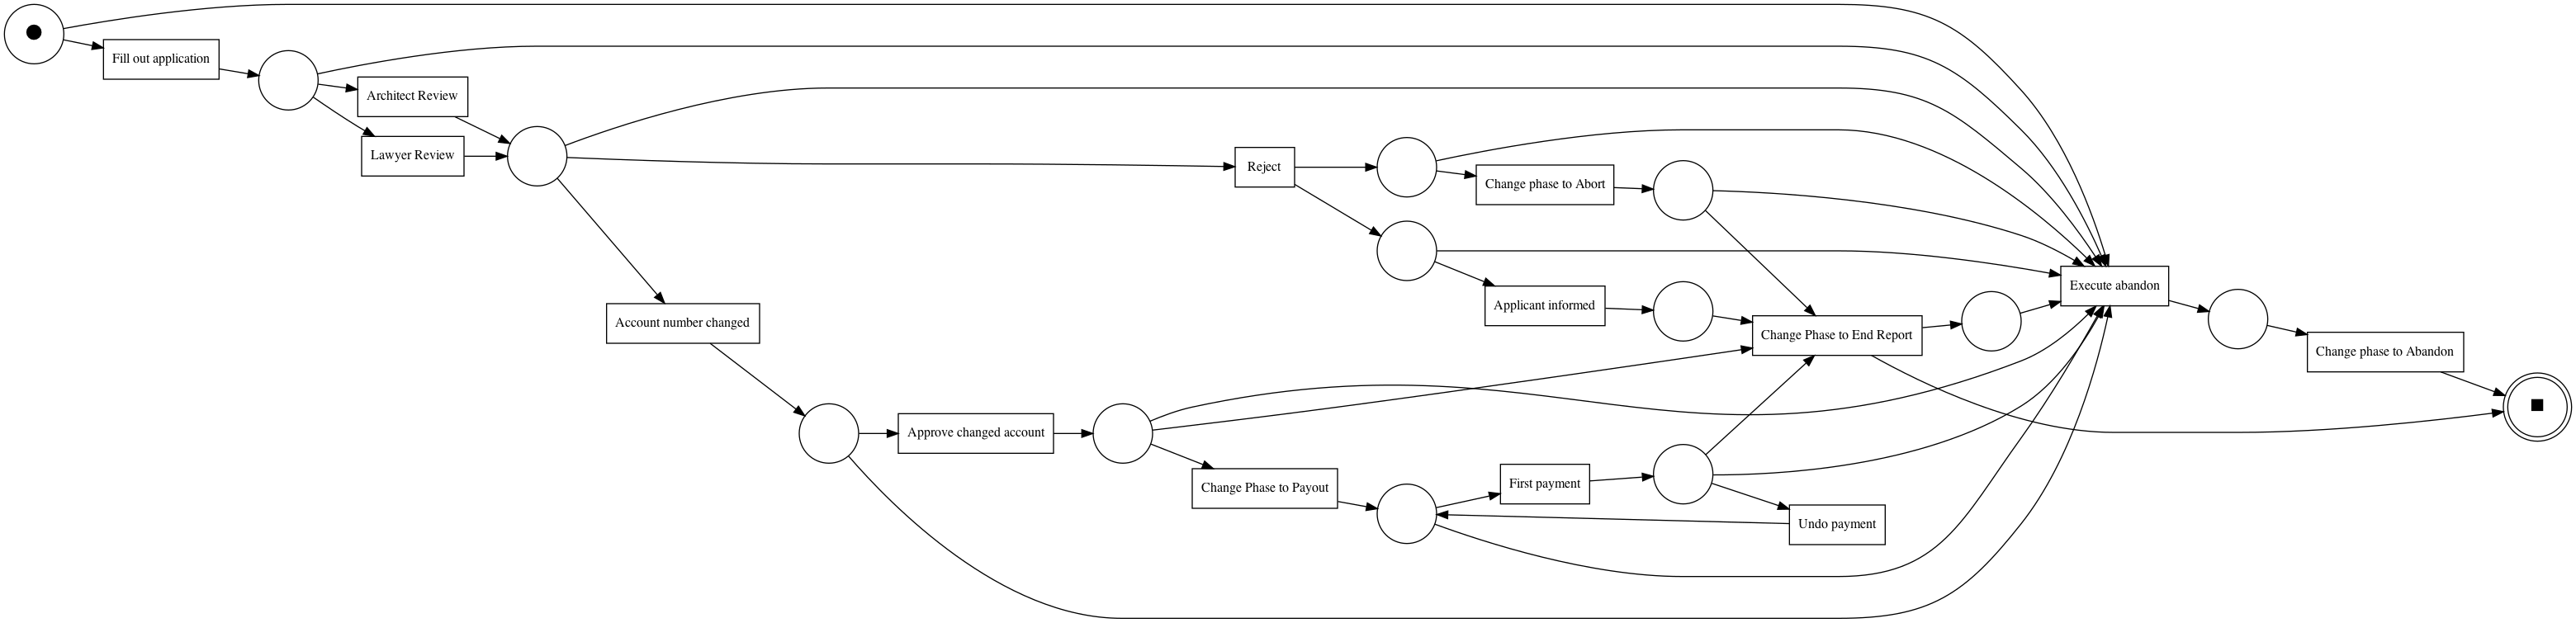

In [358]:
#Add rule 9 to the Petri net
petri_utils.add_arc_from_to(t_execute_abandon, p13, net)
petri_utils.add_arc_from_to(p13, t_change_phase_to_abandon, net)

#Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.
# We should make execute be executeable at any time.
petri_utils.add_arc_from_to(p1, t_execute_abandon, net)
petri_utils.add_arc_from_to(p2, t_execute_abandon, net)
petri_utils.add_arc_from_to(p3, t_execute_abandon, net)

petri_utils.add_arc_from_to(t_change_phase_to_end_report ,p4, net)
petri_utils.add_arc_from_to(t_change_phase_to_abandon ,p4, net)

petri_utils.add_arc_from_to(p5, t_execute_abandon, net)
petri_utils.add_arc_from_to(p6, t_execute_abandon, net)
petri_utils.add_arc_from_to(p7, t_execute_abandon, net)
# petri_utils.add_arc_from_to(p8, t_execute_abandon, net)
petri_utils.add_arc_from_to(p9, t_execute_abandon, net)
petri_utils.add_arc_from_to(p10, t_execute_abandon, net)
petri_utils.add_arc_from_to(p11, t_execute_abandon, net)
petri_utils.add_arc_from_to(p12, t_execute_abandon, net)
petri_utils.add_arc_from_to(p14, t_execute_abandon, net)

# Extra rules we added
petri_utils.add_arc_from_to(p3, t_account_number_changed, net)

petri_utils.add_arc_from_to(p3, t_reject, net)
petri_utils.add_arc_from_to(t_applicant_informed, p15, net)
petri_utils.add_arc_from_to(t_change_phase_to_abort, p14, net)
petri_utils.add_arc_from_to(p14, t_change_phase_to_end_report, net)
petri_utils.add_arc_from_to(p15, t_change_phase_to_end_report, net)

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## Task 2


For each rule describe how the rule is implemented (as a short paragraph for each rule).

**Rule 1**
For the first rule we inserted an initial place to indicate a starting point which has a relation to the first activity, Fill out application. The design itself is sequential routing.

**Rule 2**
For this rule we inserted a place so we could do a OR split. Hereby asserting that they cannot occur together by the definition of the OR split. 

**Rule 3**
For this rule we have implemented an OR split. We can see the split in the place before the two activities "Lawyer Review" and "Architect Review" and a OR join in the place right after. This assures that we can only go to one of them and thus they cannot occur together. We therefore assume that they do not both need to happen in out workflow. We therefore 

**Rule 4**
For this rule we wanted to do a AND routing. Therefore we constructed an AND split and and an AND join. Where the AND join begin at reject, and the AND join is at Change Phase to End Report. 

**Rule 5**
Used iterative routing and split at the place after First payment that leads to Undo Payment that leads back to First Payment

**Rule 6** 
A sequantial routing from Acount number changed to Approve changed account to First Payment. 

**Rule 7** 
Used a sequantial routingfrom Change to Phase to Payout to First payment

**Rule 8**
From Change Phase to Payout we used a sequantial routing to First Payment then to Change Phase to End Report. In the state Change Phase to End Report we added a OR-join transition from other states 

**Rule 9**
Atu all places we make a transistion to Execute abondon, and from Execute abondon we used a sequential routing to Change phase to abondon

## Task 3

Answer the following questions and add a short (1 paragraph) argument for your answer:

**Is your Petri net live and/or quasi-live?**
Our Petri net is not live because every transitions are not fired. Example when after "Fill out application" then either a transition to Lawyer Review or Architect Review is fired. Our Petri net is quasi-live because there exist transitions to all markings that can occur.

**Is your Petri net bounded and/or safe?**
Our Petri net is safe because all places M have exactly 1 token. This means that our Petri net is also bounded because the upper limit of token in each place is 1.


**Is your Petri net a WorkFlow net?**
One of the restriction for a WorkFlow net is that the Petri net should be strongly connected when you can make a transistion from o to i, and for every nodes (places and transistions) x and y, there exists transistions from x to y. From our initial place i (No ingoing arcs) and our final place o (No outgoing arcs) if we add a transition from o to i then you can get to any places and our Petri net is strongly connected. Therefore our Petrinet is a Workflow net.

# Part 2: Modelling Event Patterns as DCR Graphs

## Task 1

Model the rules from part 1 as individual DCR Graphs. (Yielding 9 graphs in total.)  Write a short description for each explaining the semantics. For convenience you may want to use an “other” event in some of your models that represents all events not explicitly mentioned.

In [359]:
# Repeat this code block 9 times, once for each pattern

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Fill out application", "Architect Review", "Lawyer Review", "Reject", 
    "Applicant informed", "Change phase to Abort", "Change Phase to Payout", 
    "First payment", "Undo payment", "Change Phase to End Report", 
    "Account number changed", "Approve changed account", "Execute abandon", 
    "Change phase to Abandon"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

"""
8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.

9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.
A -> B

graph.conditions["B"] = {"A"}   # ->o   A must happen before B can happen
graph.responses["A"] = {"B"}    # o->   If A has happened then B must happen before workflow is completed. Not required to run B for each execution of A.
graph.excludes["A"] = {"B"}     # ->%   If A is applied do not do B.
graph.includes["A"] = {"B"}     # ->+   If A is applied then do also B. 

## -> <> No milestone because nested conditions are not supported in thid DCR graph?
"""

# pm4py.view_dcr(graph)

'\n8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.\n\n9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.\nA -> B\n\ngraph.conditions["B"] = {"A"}   # ->o   A must happen before B can happen\ngraph.responses["A"] = {"B"}    # o->   If A has happened then B must happen before workflow is completed. Not required to run B for each execution of A.\ngraph.excludes["A"] = {"B"}     # ->%   If A is applied do not do B.\ngraph.includes["A"] = {"B"}     # ->+   If A is applied then do also B. \n\n## -> <> No milestone because nested conditions are not supported in thid DCR graph?\n'

In [ ]:
# Add rules 1-8 to the DCR graph

def initiallize(graph, events):
    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event
    for event in graph.events:
        graph.marking.included.add(event)
    return graph

# Rule 1. Fill out application should always be the first event of the case. 
graph1 = DcrGraph()
events1 = ["Fill out application", "Others Event"]
initiallize(graph1, events1)
graph1.conditions["Others Event"] = {"Fill out application"}
graph1.excludes["Fill out application"] = {"Fill out application"}
graph1.marking.pending.add("Fill out application")
pm4py.view_dcr(graph1)


# Rule 2. Lawyer Review and Architect Review can not occur unless Fill out application happened before.
graph2 = DcrGraph()
events2 = ["Fill out application", "Lawyer Review", "Architect Review"]
initiallize(graph2, events2)
graph2.conditions["Lawyer Review"] = {"Fill out application"}
graph2.conditions["Architect Review"] = {"Fill out application"}
pm4py.view_dcr(graph2)


# Rule 3. Lawyer Review and Architect Review should never occur together.
graph3 = DcrGraph()
events3 = ["Lawyer Review", "Architect Review"]
initiallize(graph3, events3)
graph3.excludes["Lawyer Review"] = {"Architect Review"}
graph3.excludes["Architect Review"] = {"Lawyer Review"}
pm4py.view_dcr(graph3)


# Rule 4. Reject should always eventually be followed by Applicant informed and Change phase to Abort.
graph4 = DcrGraph()
events4 = ["Reject", "Applicant informed", "Change phase to Abort"]
initiallize(graph4, events4)
graph4.includes["Reject"] = {"Applicant informed", "Change phase to Abort"}
pm4py.view_dcr(graph4)

# Rule 5. First payment should only occur once, unless Undo payment is executed afterwards, in which case it may be repeated once more.
graph5 = DcrGraph()
events5 = ["First payment", "Undo payment", "Other Events 1", "Other Events 2"]
initiallize(graph5, events5)
graph5.conditions["First payment"] = {"Other Events 1"}
graph5.conditions["Undo payment"] = {"First payment"}
graph5.conditions["Other Events 2"] = {"First payment"}
graph5.includes["Undo payment"] = {"First payment"}
graph5.excludes["First payment"] = {"First payment"}
pm4py.view_dcr(graph5)

# Rule 6. If Account number changed happens, then afterwards Approve changed account needs to be executed and we can no longer execute First payment until the approval has happened.
graph6 = DcrGraph()
events6 = ["Account number changed", "Approve changed account", "First payment", "Other Events"]
initiallize(graph6, events6)
graph6.conditions["Account number changed"] = {"Other Events"}
graph6.conditions["Approve changed account"] = {"Account number changed"}
graph6.responses["Account number changed"] = {"Approve changed account"}
graph6.excludes["First payment"] = {"Approve changed account", "Account number changed"}
graph6.conditions["First payment"] = {"Approve changed account"}
pm4py.view_dcr(graph6)

# Rule 7. Change Phase to Payout should always eventually be followed by First payment.
graph7 = DcrGraph()
events7 = ["Change Phase to Payout", "First payment"]
initiallize(graph7, events7)
graph7.responses["Change Phase to Payout"] = {"First payment"}
graph7.conditions["First payment"] = {"Change Phase to Payout"}
pm4py.view_dcr(graph7)

# Rule 8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.
graph8 = DcrGraph()
events8 = ["Change Phase to Payout", "First payment", "Change Phase to End Report", "Others Events"]
initiallize(graph8, events8)
graph8.conditions["Change Phase to Payout"] = {"Others Events"}
graph8.conditions["Change Phase to End Report"] = {"Others Events", "First payment"}
graph8.responses["Change Phase to Payout"] = {"First payment"}
pm4py.view_dcr(graph8)

# Rule 9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.
graph9 = DcrGraph()
events9 = ["Execute abandon", "Change phase to Abandon", "All Other Events"]
initiallize(graph9, events9)
graph9.responses["Execute abandon"] = {"Change phase to Abandon"}
graph9.conditions["Execute abandon"] = {"All Other Events"}
graph9.excludes["Execute abandon"] = {"All Other Events"}
pm4py.view_dcr(graph9)


## Task 2

Combine the separate patterns into a single model.

# DCR without rule 9

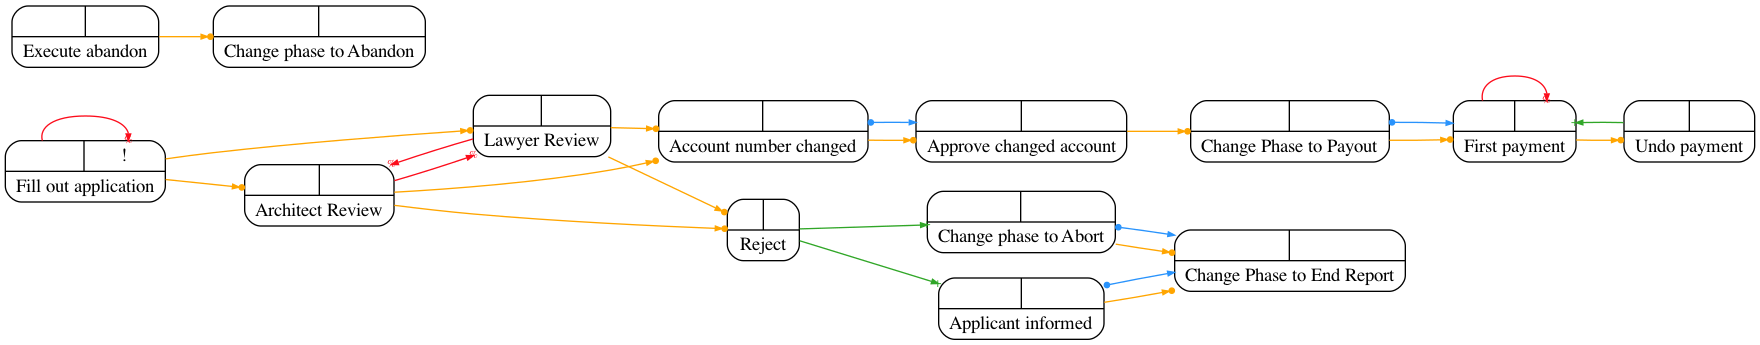

In [ ]:
# Add your code here

# Repeat this code block 9 times, once for each pattern
""" Rule 1-8
1. Fill out application should always be the first event of the case. 
2. Lawyer Review and Architect Review can not occur unless Fill out application happened before.
3. Lawyer Review and Architect Review should never occur together.
4. Reject should always eventually be followed by Applicant informed and Change phase to Abort.
5. First payment should only occur once, unless Undo payment is executed afterwards, in which case it may be repeated once more.
6. If Account number changed happens, then afterwards Approve changed account needs to be executed and we can no longer execute First payment until the approval has happened.
7. Change Phase to Payout should always eventually be followed by First payment.
8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.
9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.
"""

from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Fill out application", "Architect Review", "Lawyer Review", "Reject", 
    "Applicant informed", "Change phase to Abort", "Change Phase to Payout", 
    "First payment", "Undo payment", "Change Phase to End Report", 
    "Account number changed", "Approve changed account", "Execute abandon", 
    "Change phase to Abandon"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)

""" Example syntax
graph.conditions["activity1"] = {"activity2"}
graph.conditions["activity2"] = {"activity3"}
graph.responses["activity1"] = {"activity3"}
graph.excludes["activity3"] = {"activity3"}
graph.conditions["activity1"] = {"activity4"}
graph.includes["activity3"] = {"activity2"}
graph.marking.included.add("activity1")
graph.marking.included.add("activity3")
graph.marking.included.add("activity4")
graph.marking.executed.add("activity1")
graph.marking.executed.add("activity4")
graph.marking.pending.add("activity3")
"""

# Rule 1
graph.marking.pending.add("Fill out application")

# Rule 2
graph.conditions["Lawyer Review"] = {"Fill out application"}
graph.conditions["Architect Review"] = {"Fill out application"}

# Rule 3
graph.excludes["Lawyer Review"] = {"Architect Review"}
graph.excludes["Architect Review"] = {"Lawyer Review"}

# Rule 4
graph.includes["Reject"] = {"Applicant informed", "Change phase to Abort"}

# Rule 5 
graph.excludes["First payment"] = {"First payment"}
graph.includes["Undo payment"] = {"First payment"}

# Rule 6
graph.responses["Account number changed"] = {"Approve changed account"}
graph.conditions["Approve changed account"] = {"Account number changed"}

# Rule 7
graph.responses["Change Phase to Payout"] = {"First payment"}

# Rule 8
graph.conditions["Change Phase to End Report"] = {"First payment"}
graph.responses["Change Phase to Payout"] = {"First payment"}
graph.marking.included.add("Execute abandon")

# From architect Review and Lawyer Review we can either go to Reject or to Account number changed
graph.conditions["Account number changed"] = {"Architect Review", "Lawyer Review"}
graph.conditions["Reject"] = {"Architect Review", "Lawyer Review"}
graph.conditions["Change Phase to Payout"] = {"Approve changed account"}
graph.conditions["First payment"] = {"Change Phase to Payout"}
graph.conditions["Undo payment"] = {"First payment"}
graph.conditions["Change Phase to End Report"] = {"Approve changed account"}
graph.conditions["Change Phase to End Report"] = {"First payment"}
graph.conditions["Change phase to Abandon"] = {"Execute abandon"}
graph.excludes["Fill out application"] = {"Fill out application"}
graph.conditions["Change Phase to End Report"] = {"Applicant informed", "Change phase to Abort"}
graph.responses["Change phase to Abort"] = {"Change Phase to End Report"}
graph.responses["Applicant informed"] = {"Change Phase to End Report"}

pm4py.view_dcr(graph)




# DCR graph with Rule 9

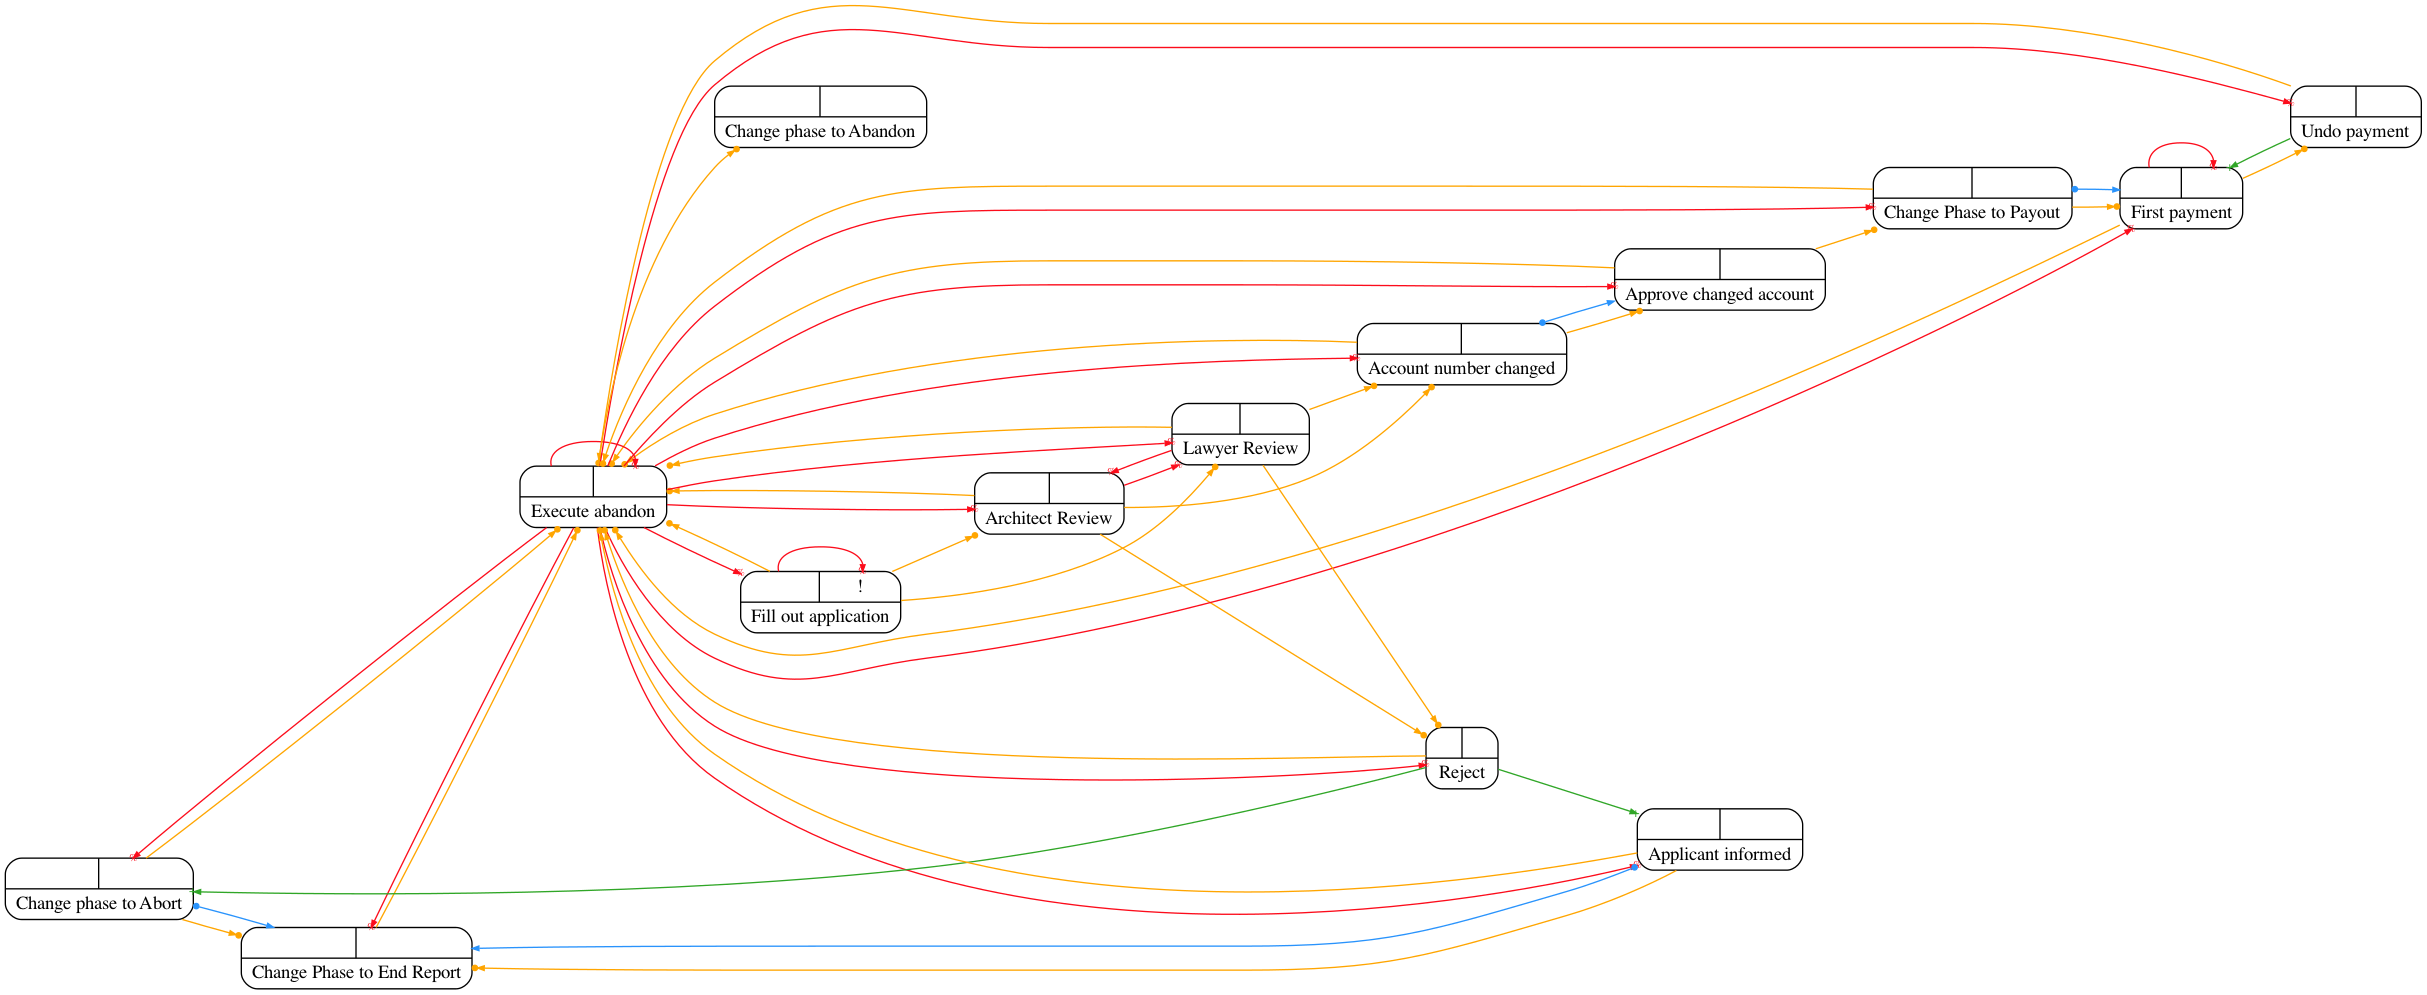

In [ ]:

# Exclude all other events except Change phase to Abandon after Execute Abandon
for event in events:
    if event != "Change phase to Abandon":
        graph.excludes["Execute abandon"] = graph.excludes.get("Execute abandon", set()) | {event}

# We need to connect all events to Execute abandon
for event in events:
    if event != "Execute abandon" and event != "Change phase to Abandon":
        graph.conditions["Execute abandon"] = graph.conditions.get("Execute abandon", set()) | {event}

pm4py.view_dcr(graph)

## Task 3

Answer the following questions:

**Which relations did you not use in your models?**
We have used almost all of the relations available to us. Here are the following relations we have used with their definitions:

graph.conditions ->o (orange) A must happen before B can happe
graph.responses  o-> (blue) If A has happened then B must happen before workflow is completed. Not required to run B for each execution of A.
graph.excludes   ->% (red) If A is applied do not do B.
graph.includes   ->+ (green) If A is applied then do also B.

We did not use the milestone relation because we did not use nesting.


**Could some of the rules have been modelled in more than one way? If so, give one or two examples.**

Rule 3: The wording suggest that Lawyer Review and Architect Review should never occur together. We understood it as only one of them should happen and not both, but it could also be understood as one of them should happen then the other is done at a later event. example that Lawyer Review needs be to completed then afterward Architect Review can happen afterward.

Rule 4: Reject should always eventually be followed by Applicant informed and Change phase to Abort. We used include that leads Reject to Applicant informed and Change phase to Abort. This could be done in a sequence so instead Applicant informed is completed then Change to Abort afterward.

From Lawyer Review and Architect Review, you can go to either Reject or Account number changed. If no changes are made, then instead we could problably have extra condition that leads to Change Phase to Payout that skip Account number changed and Approve changed account.

From an annoucement in Absolon nesting in D4RPY is very limited and instead of having a condition and exclude arroove from all event to Execute abondon, then we would make a nesing and a condition that leads to Execute Abondon.

From Change phase to Abort and Applicat informed we have arrows to Change Phase to End Report. We could have arrows to Execute abondon. 


**How does your model differ from the Petri net? Do they exhibit the same language?**
While they both overlap in modelling workflows, they do generally not exhibit the same language. DCR graphs prioritize flexibility and high-level contraints, while on the other hand, Petri Nets focus more on precise control and synchronization.  j
